In [43]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib

In [45]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
file_path = '/content/drive/MyDrive/Emotion_classify_Data.csv'
df = pd.read_csv(file_path)

In [47]:
print("First 5 rows:")
print(df.head())

First 5 rows:
                                             Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear


In [49]:
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text



In [50]:
# Apply text cleaning
df['Comment'] = df['Comment'].astype(str).apply(clean_text)

# Check column names to identify label column
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['Comment', 'Emotion'], dtype='object')


In [53]:
# X = df['text']  # This line caused the KeyError
X = df['Comment'] # Use the correct column name 'Comment'
# y = df['emotion'] # This caused the KeyError
y = df['Emotion'] # Use the correct column name 'Emotion' based on df.columns output

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline with TF-IDF and SVM with sigmoid kernel
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('svm', SVC(kernel='sigmoid'))
])

In [54]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('svm', SVC(kernel='sigmoid'))])


Classification Report:
              precision    recall  f1-score   support

       anger       0.92      0.94      0.93       392
        fear       0.96      0.92      0.94       416
         joy       0.94      0.96      0.95       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188


Confusion Matrix:
[[370   9  13]
 [ 23 383  10]
 [  8   9 363]]


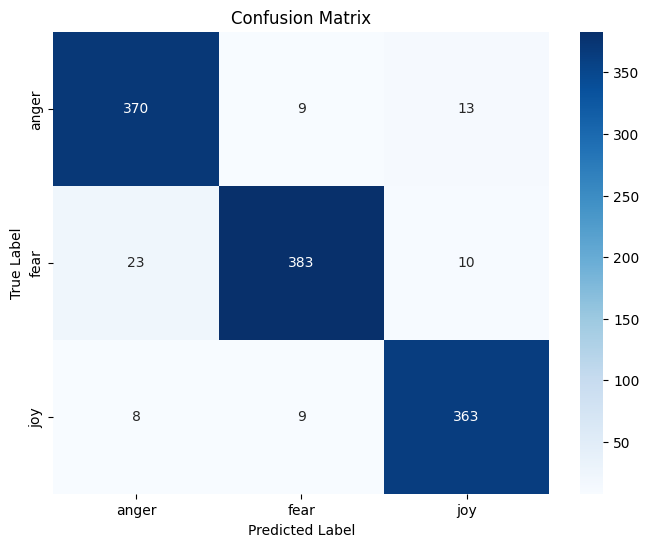

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix array
print("\nConfusion Matrix:")
print(cm)

# Optional: Plot confusion matrix heatmap for better visualization
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [56]:
# Example sentence to predict
new_sentence = "I am so happy and excited today!"

# Clean the sentence using the same preprocessing function
cleaned_sentence = clean_text(new_sentence)

# Predict emotion
predicted_emotion = pipeline.predict([cleaned_sentence])[0]

print(f"Predicted emotion: {predicted_emotion}")


Predicted emotion: joy


In [59]:
import streamlit as st
import joblib
import re
import string

# Load the saved pipeline
pipeline.fit(X_train, y_train)

# Save the trained pipeline
joblib.dump(pipeline, 'emotion_detection_model.pkl')

# Same preprocessing function you used before
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Streamlit app
st.title("Emotion Detection from Text")

user_input = st.text_area("Enter your sentence here:")

if st.button("Predict Emotion"):
    if user_input.strip() == "":
        st.warning("Please enter some text to predict.")
    else:
        cleaned_input = clean_text(user_input)
        prediction = pipeline.predict([cleaned_input])[0]
        st.success(f"Predicted Emotion: {prediction}")


2025-05-23 17:10:30.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 17:10:30.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 17:10:30.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 17:10:30.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 17:10:30.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 17:10:30.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 17:10:30.281 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 17:10:30.282 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar